# Data Visualization

In [119]:
import numpy as np
import pandas as pd
from scipy import stats, special
from matplotlib import pyplot as plt

## Problem 2

In [27]:
def bernstein(n, v ,x):
    return special.binom(n, v) * x ** v * (1 - x) ** (n - v)

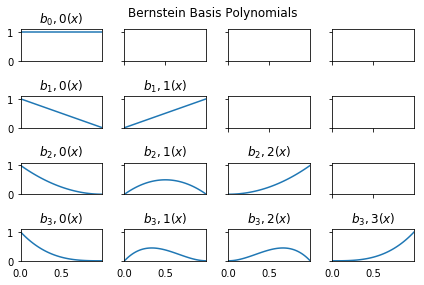

In [59]:
x = np.linspace(0, 1, 100)

fig, axes = plt.subplots(4, 4, sharex=True, sharey=True)
for n in range(4):
    for v in range(n+1):
        axes[n,v].plot(x, bernstein(n, v, x))
        axes[n,v].tick_params(labelcolor='k', top=False, bottom=False, \
        left=True, right=False)
        axes[n,v].set_title(r"$b_{},{}(x)$".format(n,v))
        
plt.axis([0, 1, 0, 1.1])
plt.suptitle("Bernstein Basis Polynomials")
plt.xticks(np.arange(0, 1, step=0.5))
plt.tight_layout()
plt.show()

In [62]:
MAYBE CAN DO MORE COOL STUFF ???

SyntaxError: invalid syntax (<ipython-input-62-f71dff84b959>, line 1)

## Problem 3

In [85]:
mlb = np.load("MLB.npy")
height = mlb[:,0]
weight = mlb[:,1]
age = mlb[:,2]

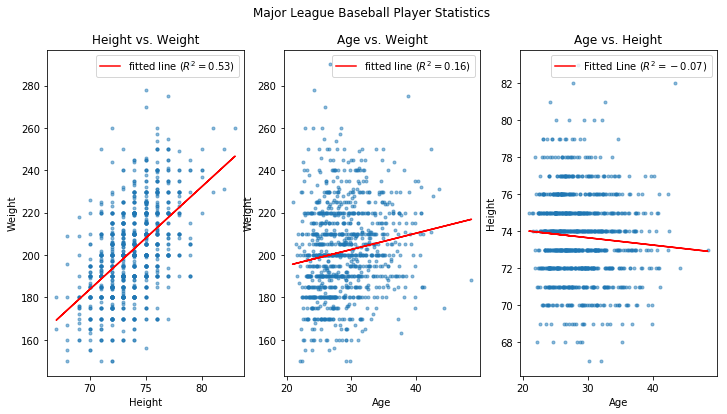

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(12,6))

axes[0].scatter(height, weight, alpha=0.5, marker='.')
axes[0].set_xlabel("Height")
axes[0].set_ylabel("Weight")
axes[0].set_title("Height vs. Weight")
slope, intercept, r_value, p_value, std_err = stats.linregress(height, weight)
axes[0].plot(height, intercept + slope * height, \
          'r-', label=r"fitted line ($R^2 = {0:.2f}$)".format(r_value))
axes[0].legend()

axes[1].scatter(age, weight, alpha=0.5, marker='.')
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Weight")
axes[1].set_title("Age vs. Weight")
slope, intercept, r_value, p_value, std_err = stats.linregress(age, weight)
axes[1].plot(age, intercept + slope * age, \
          'r-', label=r"fitted line ($R^2 = {0:.2f}$)".format(r_value))
axes[1].legend()

axes[2].scatter(age, height, alpha=0.5, marker='.')
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Height")
axes[2].set_title("Age vs. Height")
slope, intercept, r_value, p_value, std_err = stats.linregress(age, height)
axes[2].plot(age, intercept + slope * age, \
          'r-', label=r"Fitted Line ($R^2 = {0:.2f}$)".format(r_value))
axes[2].legend()

plt.suptitle("Major League Baseball Player Statistics")
plt.show()

## Problem 5

In [105]:
def rosenbrock(x, y):
    return (1-x)**2 + 100*(y-x**2)**2

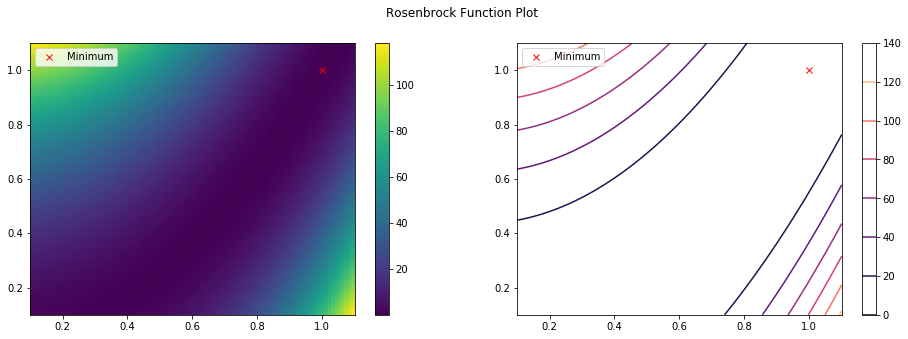

In [181]:
x = np.linspace(0.1, 1.1, 100)
X, Y = np.meshgrid(x, x)
Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(16,5))

point = pd.DataFrame({'x': [1], 'y': [1]})

ax1 = plt.subplot(121)
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.plot(1,1, "rx", label="Minimum")
plt.legend(loc='upper left')
plt.colorbar(ax=ax1)

ax2 = plt.subplot(122)
plt.contour(X, Y, Z, cmap="magma")
plt.plot(1,1, "rx", label="Minimum")
plt.legend(loc='upper left')
plt.colorbar(ax=ax2)

plt.suptitle("Rosenbrock Function Plot")
plt.show()

## Problem 6

In [217]:
pop, gdp, male_h, female_h = np.load("countries.npy").T
countries = np.array(["Austria", "Bolivia", "Brazil", "China",
            "Finland", "Germany", "Hungary", "India",
            "Japan", "North Korea", "Montenegro", "Norway",
            "Peru", "South Korea", "Sri Lanka", "Switzerland",
            "Turkey", "United Kingdom", "United States", "Vietnam"])

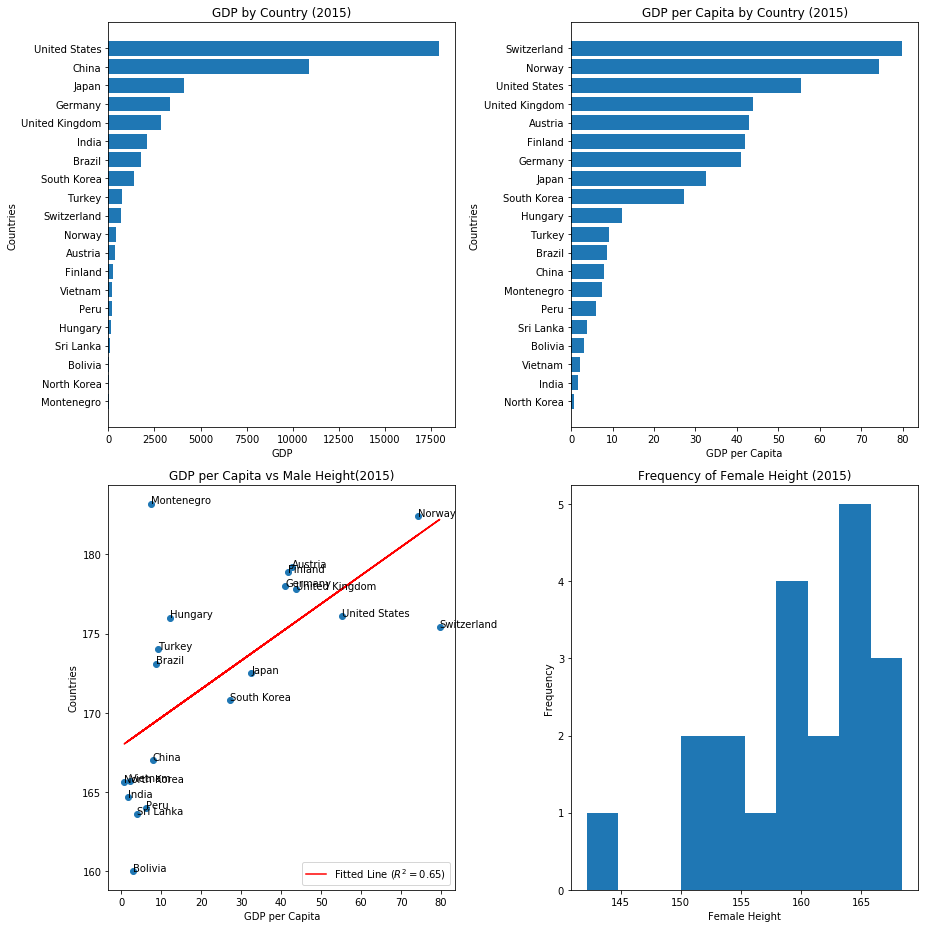

In [231]:
fig, axes = plt.subplots(2,2,figsize=(13,13))

positions = np.arange(len(countries))
gdp_order = np.argsort(gdp)
axes[0,0].barh(positions, gdp[gdp_order], align="center")
axes[0,0].set_yticks(positions)
axes[0,0].set_yticklabels(countries[gdp_order])
axes[0,0].set_xlabel("GDP")
axes[0,0].set_ylabel("Countries")
axes[0,0].set_title("GDP by Country (2015)")

gdp_per_cap = gdp/pop
gdppc_order = np.argsort(gdp_per_cap)
axes[0,1].barh(positions, gdp_per_cap[gdppc_order], align="center")
axes[0,1].set_yticks(positions)
axes[0,1].set_yticklabels(countries[gdppc_order])
axes[0,1].set_xlabel("GDP per Capita")
axes[0,1].set_ylabel("Countries")
axes[0,1].set_title("GDP per Capita by Country (2015)")

axes[1,0].scatter(gdp_per_cap, male_h)
for i, country in enumerate(countries):
    axes[1,0].annotate(country, (gdp_per_cap[i], male_h[i]))
slope, intercept, r_value, p_value, std_err = stats.linregress(gdp_per_cap, male_h)
axes[1,0].plot(gdp_per_cap, intercept + slope*(gdp_per_cap), \
               'r-', label=r"Fitted Line ($R^2 = {0:.2f}$)".format(r_value))
axes[1,0].legend(loc='lower right')
axes[1,0].set_xlabel("GDP per Capita")
axes[1,0].set_ylabel("Countries")
axes[1,0].set_title("GDP per Capita vs Male Height(2015)")

axes[1,1].hist(female_h, bins=10)
axes[1,1].set_xlabel("Female Height")
axes[1,1].set_ylabel("Frequency")
axes[1,1].set_title("Frequency of Female Height (2015)")

plt.tight_layout()
plt.show()